# EDA - OBESITY

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 930 kB 53.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.style.use('ggplot')

## Carga de datos

In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/RodrigoAcev/OBESITY_LEVELS/master/data/ObesityDataSet_raw_and_data_sinthetic.csv')
df_raw

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df_raw.count()

Gender                            2111
Age                               2111
Height                            2111
Weight                            2111
family_history_with_overweight    2111
FAVC                              2111
FCVC                              2111
NCP                               2111
CAEC                              2111
SMOKE                             2111
CH2O                              2111
SCC                               2111
FAF                               2111
TUE                               2111
CALC                              2111
MTRANS                            2111
NObeyesdad                        2111
dtype: int64

### Info de variables

- **Gender** **{Female,Male}**
- **Age** numeric
- **Height** numeric
- **Weight** numeric
- **family_history_with_overweight** **{yes,no}**
- **FAVC** (Frequent consumption of high caloric food) **{yes,no}**
- **FCVC** (Frequency of consumption of vegetables) **numeric. {never, sometimes, always}**.
- **NCP** (Number of main meals) **numeric. {Between 1 y 2, Three, More than three}**.
- **CAEC** (Consumption of food between meals) **{no,Sometimes,Frequently,Always}**
- **SMOKE** {yes,no}
- **CH2O** (Consumption of water daily) **numeric. {Less than a liter, Between 1 and 2 L, More than 2 L}**
- **SCC** (monitor the calories you eat daily) **{yes,no}**
- **FAF** (physical activity) **numeric. {I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days}**
- **TUE** (Time using technology devices ) **numeric. {0–2 hours, 3–5 hours, More than 5 hours}**
- **CALC** (Alcohol consumption) **{no,Sometimes,Frequently,Always}**
- **MTRANS** (transportation do you usually use) **{Automobile,Motorbike,Bike,Public_Transportation,Walking}**
- **NObeyesdad** {Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III}


In [ ]:
df_info = pd.concat([df_raw.nunique(),df_raw.dtypes],axis=1)
df_info.rename(columns={0:'valoresUnicos',
                       1:'tipoVariable'},
              inplace=True)
df_info['muestras'] = df_raw.count()
df_info

,valoresUnicos,tipoVariable,muestras
Gender,2,object,2111
Age,1402,float64,2111
Height,1574,float64,2111
Weight,1525,float64,2111
family_history_with_overweight,2,object,2111
FAVC,2,object,2111
FCVC,810,float64,2111
NCP,635,float64,2111
CAEC,4,object,2111
SMOKE,2,object,2111


In [ ]:
df_temp = df_raw.copy()
df_temp['BMI'] = df_raw['Weight']/df_raw['Height']/df_raw['Height']
pd.concat([df_temp[['BMI', 'NObeyesdad']].groupby('NObeyesdad').min(),df_temp[['BMI', 'NObeyesdad']].groupby('NObeyesdad').max()], axis=1)

,BMI,BMI
NObeyesdad,,
Insufficient_Weight,12.998685,19.082206
Normal_Weight,18.491124,24.913495
Obesity_Type_I,29.911958,35.171095
Obesity_Type_II,34.048509,39.786652
Obesity_Type_III,36.774400,50.811753
Overweight_Level_I,22.826739,28.769607
Overweight_Level_II,25.713513,30.362877


In [ ]:
df_info['tipoVariable'].value_counts()

object     9
float64    8
Name: tipoVariable, dtype: int64

### Cantidad de muestras por Clase

In [ ]:
class_labels = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']


obs_count = df_raw[['NObeyesdad', 'Gender']].groupby('NObeyesdad', as_index=False).count().rename(columns={'Gender':'Count'})
obs_count = obs_count.set_index('NObeyesdad').loc[class_labels].reset_index()
obs_count

,NObeyesdad,Count
0,Insufficient_Weight,272
1,Normal_Weight,287
2,Overweight_Level_I,290
3,Overweight_Level_II,290
4,Obesity_Type_I,351
5,Obesity_Type_II,297
6,Obesity_Type_III,324


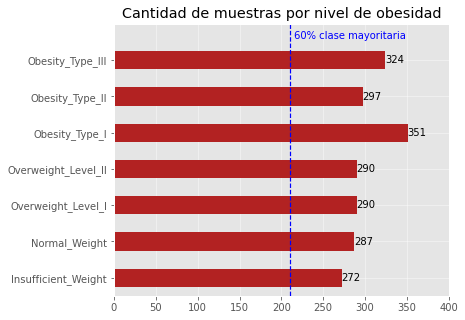

In [ ]:
count_y = obs_count['Count']
count_x = obs_count['NObeyesdad']

maj_class = count_y.max()
imb_thres = maj_class*.6

fig, axes = plt.subplots(figsize=(6,5))
barras = axes.barh(count_x, count_y, align='center', height=.5, color='firebrick')
axes.plot([imb_thres]*2, [-10,10], 'b--', linewidth=1.2)
axes.text(imb_thres+5, 6.6, '60% clase mayoritaria', color='blue')
axes.set_title('Cantidad de muestras por nivel de obesidad')

axes.bar_label(barras)
axes.set_xlim(right=400)
axes.set_ylim([-.5,7])
axes.grid(alpha=.5)
plt.show()

## Estadistica del dataset

In [ ]:
#Definir variables numericas y categoricas:
cat_cols = df_info.loc[df_info['tipoVariable']=='object'].index
num_cols = df_info.loc[df_info['tipoVariable']=='float64'].index

cat_cols, num_cols

(Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
        'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
       dtype='object'),
 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object'))

### Variables numéricas

In [ ]:
df_raw.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


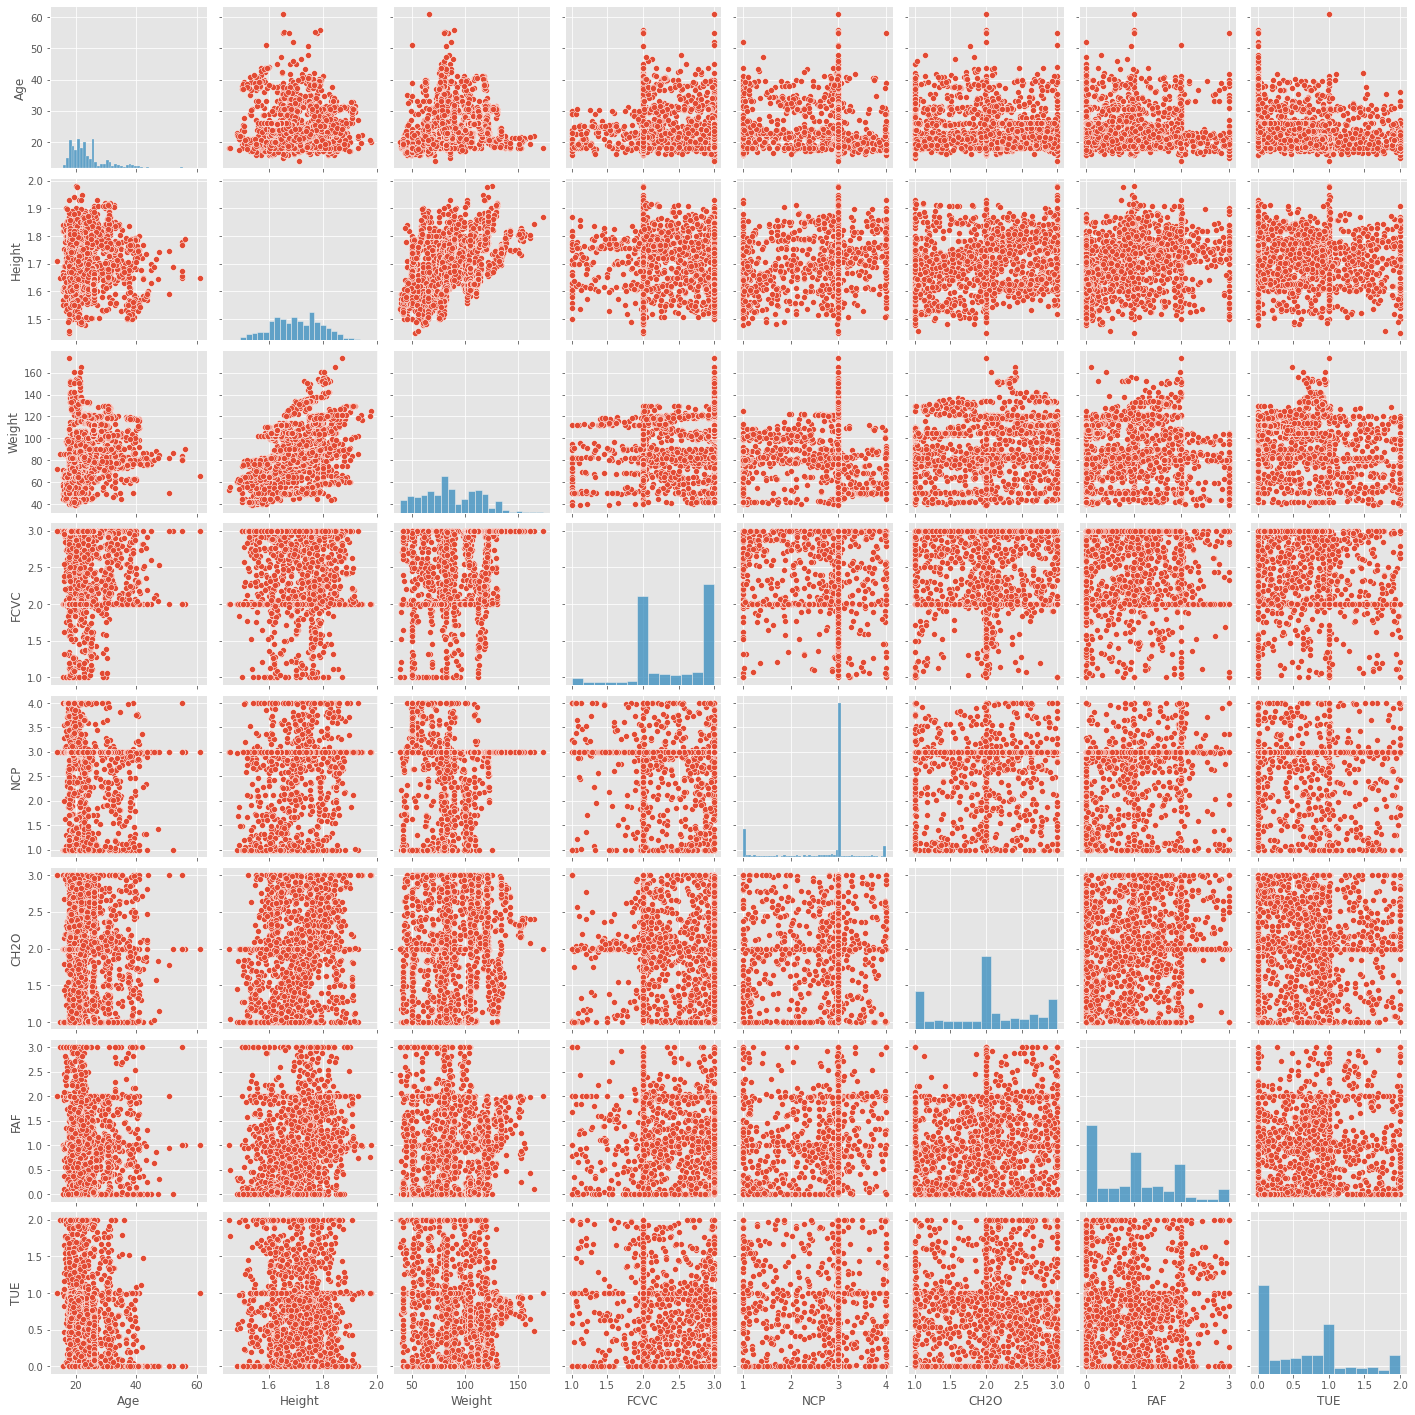

In [ ]:
sns.pairplot(data=df_raw)

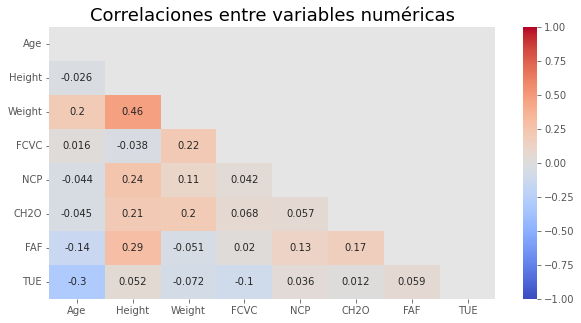

In [ ]:
#Correlacion entre variables numericas
plt.figure(figsize=(10, 5))

mask = np.triu(np.ones_like(df_raw.corr(), dtype=bool))

heatmap = sns.heatmap(df_raw.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlaciones entre variables numéricas', fontdict={'fontsize':18})

plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Height'>

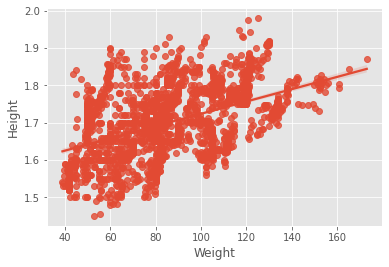

In [ ]:
#fig, axs = plt.subplots(figsize=(6,5))
sns.regplot(data=df_raw, x='Weight', y='Height')

<AxesSubplot:xlabel='Weight', ylabel='Height'>

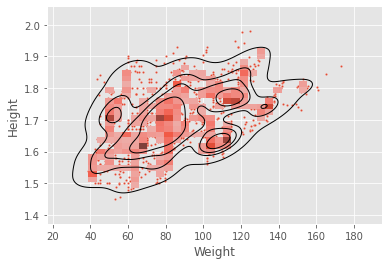

In [ ]:
sns.scatterplot(data=df_raw, x='Weight', y='Height', s=5)
sns.histplot(data=df_raw, x='Weight', y='Height', bins=30, pthresh=.1)
sns.kdeplot(data=df_raw, x='Weight', y='Height', levels=5, color="k", linewidths=1)

<AxesSubplot:xlabel='Age', ylabel='TUE'>

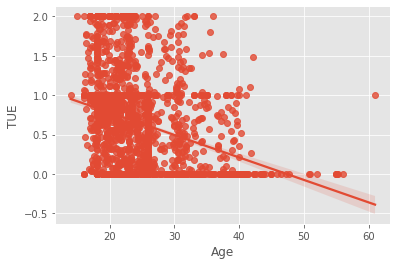

In [ ]:
sns.regplot(data=df_raw, x='Age', y='TUE')

<AxesSubplot:xlabel='Age', ylabel='TUE'>

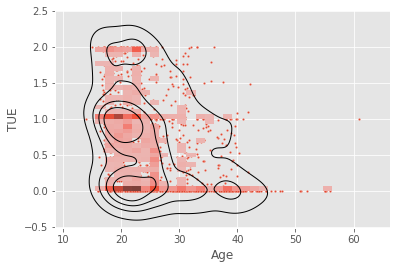

In [ ]:
sns.scatterplot(data=df_raw, x='Age', y='TUE', s=5)
sns.histplot(data=df_raw, x='Age', y='TUE', bins=30, pthresh=.1)
sns.kdeplot(data=df_raw, x='Age', y='TUE', levels=5, color="k", linewidths=1)

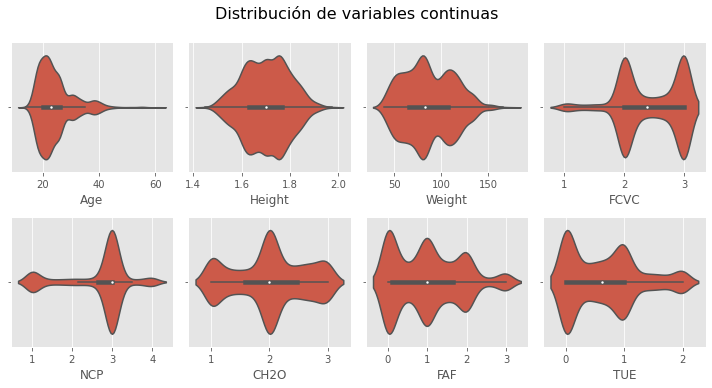

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(10,5))

for i, variable in enumerate(num_cols):
    sns.violinplot(data=df_raw, x=variable, ax=axs[i//4][i%4])
fig.tight_layout() 
fig.suptitle('Distribución de variables continuas\n', va='bottom', size=16)    
plt.show()

### Variables categóricas

In [ ]:
df_raw[cat_cols[0]].value_counts().values

array([1068, 1043])

In [ ]:
len(cat_cols)

9

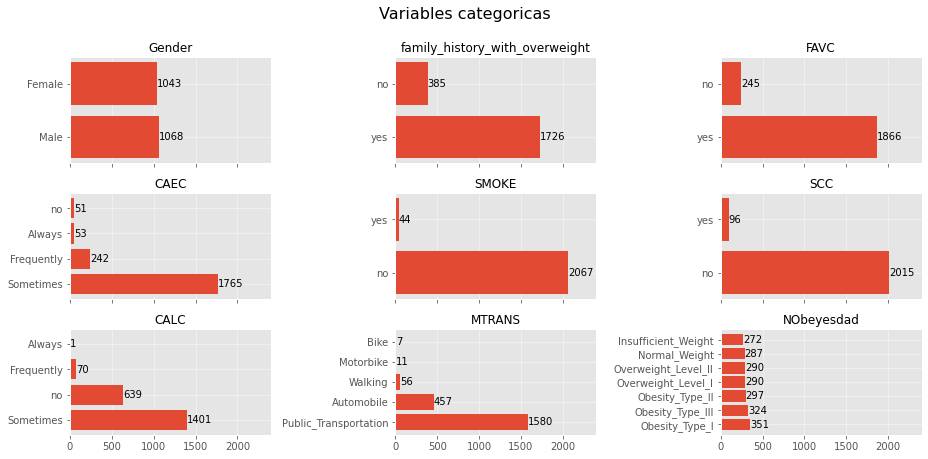

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(13,6), sharex=True)

for i, variable in enumerate(cat_cols):
    counter = df_raw[variable].value_counts()
    x_labels = counter.index
    y_values = counter.values
    barra = axs[i//3][i%3].barh(x_labels, y_values)
    
    axs[i//3][i%3].set_title(f'{variable}', size=12)
    axs[i//3][i%3].bar_label(barra)
    axs[i//3][i%3].set_xlim([0,2400])
    axs[i//3][i%3].grid(alpha=.5)
    

fig.tight_layout() 
fig.suptitle('Variables categoricas\n', va='bottom', size=16)
plt.show()

In [ ]:
class_dict = {}
inv_class = {}
for i, c  in enumerate(class_labels):
    class_dict[c]=i
    inv_class[i] = c
class_dict

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Obesity_Type_I': 4,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3}

In [ ]:
df = df_raw.copy()
#df.rename(columns={'NObeyesdad':'Obs_lvl'}, inplace=True)
df['NObeyesdad'] = df['NObeyesdad'].apply(lambda x: class_dict[x])
df.sort_values('NObeyesdad', inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
513,Female,21.243142,1.598019,44.845655,no,no,3.000000,1.726260,Frequently,no,2.444125,no,1.318170,0.000000,no,Public_Transportation,0
582,Female,22.926352,1.715597,50.000000,yes,yes,2.449267,3.647154,Frequently,no,1.266018,no,0.866045,0.097234,no,Public_Transportation,0
581,Male,18.525525,1.856633,59.258372,yes,yes,2.592247,3.304123,Sometimes,no,2.036764,no,2.038653,1.119877,no,Automobile,0
580,Male,17.000000,1.824414,59.295172,yes,yes,2.432302,3.000000,Sometimes,no,2.000000,no,2.349495,1.000000,no,Automobile,0
579,Male,17.000000,1.848294,59.409018,yes,yes,2.440040,3.000000,Sometimes,no,2.000000,no,2.784471,1.000000,no,Automobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,Female,25.617227,1.628019,108.265922,yes,yes,3.000000,3.000000,Sometimes,no,1.621300,no,0.090917,0.438216,Sometimes,Public_Transportation,6
1889,Female,26.000000,1.628909,106.875927,yes,yes,3.000000,3.000000,Sometimes,no,2.686824,no,0.000000,0.540812,Sometimes,Public_Transportation,6
1888,Female,25.989938,1.644199,105.036075,yes,yes,3.000000,3.000000,Sometimes,no,2.310076,no,0.071150,0.733085,Sometimes,Public_Transportation,6
1906,Female,26.000000,1.631856,110.804337,yes,yes,3.000000,3.000000,Sometimes,no,2.704850,no,0.000000,0.243338,Sometimes,Public_Transportation,6


In [ ]:
df.replace({'yes':1,
            'no':0,
            'Sometimes':1,
            'Frequently':2,
            'Always':3,
            'Male':0,
            'Female':1
           }, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 513 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             

### Correlación entre variables

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df['MTRANS'] = oe.fit_transform(df['MTRANS'].to_numpy().reshape(-1,1))
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
513,1,21.243142,1.598019,44.845655,0,0,3.000000,1.726260,2,0,2.444125,0,1.318170,0.000000,0,3.0,0
582,1,22.926352,1.715597,50.000000,1,1,2.449267,3.647154,2,0,1.266018,0,0.866045,0.097234,0,3.0,0
581,0,18.525525,1.856633,59.258372,1,1,2.592247,3.304123,1,0,2.036764,0,2.038653,1.119877,0,0.0,0
580,0,17.000000,1.824414,59.295172,1,1,2.432302,3.000000,1,0,2.000000,0,2.349495,1.000000,0,0.0,0
579,0,17.000000,1.848294,59.409018,1,1,2.440040,3.000000,1,0,2.000000,0,2.784471,1.000000,0,0.0,0


In [ ]:
oe.categories_

[array([0., 1., 2., 3., 4.])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 513 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             

In [ ]:
df_raw.describe().loc[['mean', 'std', 'min','max']].T

,mean,std,min,max
Age,24.312600,6.345968,14.00,61.00
Height,1.701677,0.093305,1.45,1.98
Weight,86.586058,26.191172,39.00,173.00
FCVC,2.419043,0.533927,1.00,3.00
NCP,2.685628,0.778039,1.00,4.00
CH2O,2.008011,0.612953,1.00,3.00
FAF,1.010298,0.850592,0.00,3.00
TUE,0.657866,0.608927,0.00,2.00


In [ ]:
df_raw.describe(include='O').T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


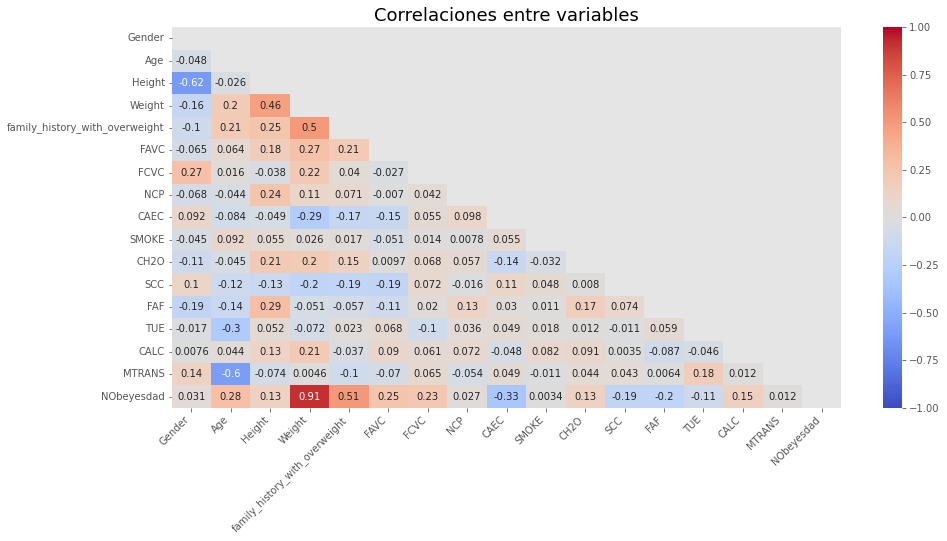

In [ ]:
fig, axs = plt.subplots(figsize=(15,7))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm", ax=axs)
heatmap.set_title('Correlaciones entre variables', fontdict={'fontsize':18})

axs.set_xticks(np.arange(df.shape[1])+.5)
axs.set_xticklabels(df.columns, rotation=45, va='top', ha='right')
plt.show()

([<matplotlib.axis.YTick at 0x7fd72b159110>,
 [Text(0, 0, 'Insufficient_Weight'),
  Text(0, 1, 'Normal_Weight'),
  Text(0, 2, 'Overweight_Level_I'),
  Text(0, 3, 'Overweight_Level_II'),
  Text(0, 4, 'Obesity_Type_I'),
  Text(0, 5, 'Obesity_Type_II'),
  Text(0, 6, 'Obesity_Type_III')])

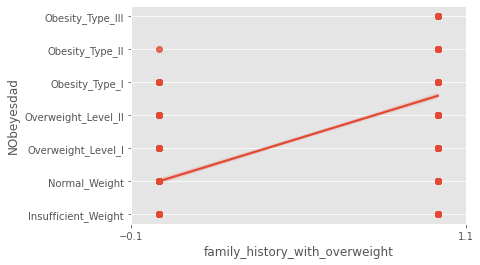

In [ ]:
#fig, axs = plt.subplots(figsize=(6,5))
sns.regplot(data=df, x='family_history_with_overweight', y='NObeyesdad')
plt.xticks([-.1,1.1])
plt.yticks(np.arange(7),labels=class_labels)

([<matplotlib.axis.XTick at 0x7fd72b2a58d0>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

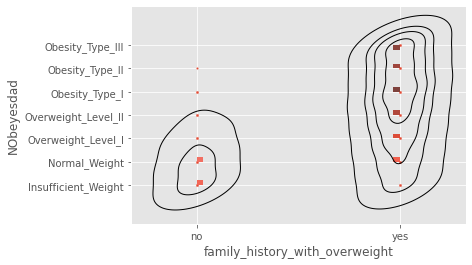

In [ ]:
sns.scatterplot(data=df, x='family_history_with_overweight', y='NObeyesdad', s=5)
sns.histplot(data=df, x='family_history_with_overweight', y='NObeyesdad', bins=30, pthresh=.1)
sns.kdeplot(data=df, x='family_history_with_overweight', y='NObeyesdad', levels=5, color="k", linewidths=1)
plt.yticks(np.arange(7),labels=class_labels)
plt.xticks([0,1], labels=['no', 'yes'])

[Text(0, 0, 'Insufficient_Weight'),
 Text(0, 1, 'Normal_Weight'),
 Text(0, 2, 'Overweight_Level_I'),
 Text(0, 3, 'Overweight_Level_II'),
 Text(0, 4, 'Obesity_Type_I'),
 Text(0, 5, 'Obesity_Type_II'),
 Text(0, 6, 'Obesity_Type_III')]

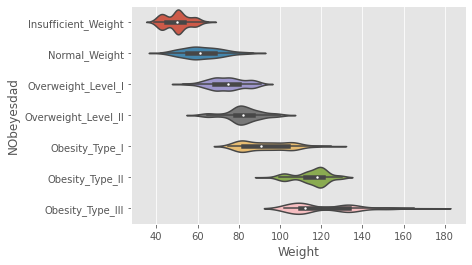

In [ ]:
fig, axs = plt.subplots(figsize=(6,4))
df_caty = df.copy()
df_caty['NObeyesdad'] = df_caty['NObeyesdad'].apply(lambda x: inv_class[x])
sns.violinplot(data=df_caty, x='Weight', y='NObeyesdad', ax=axs)
axs.set_yticks(np.arange(len(class_labels)))
axs.set_yticklabels(class_labels)

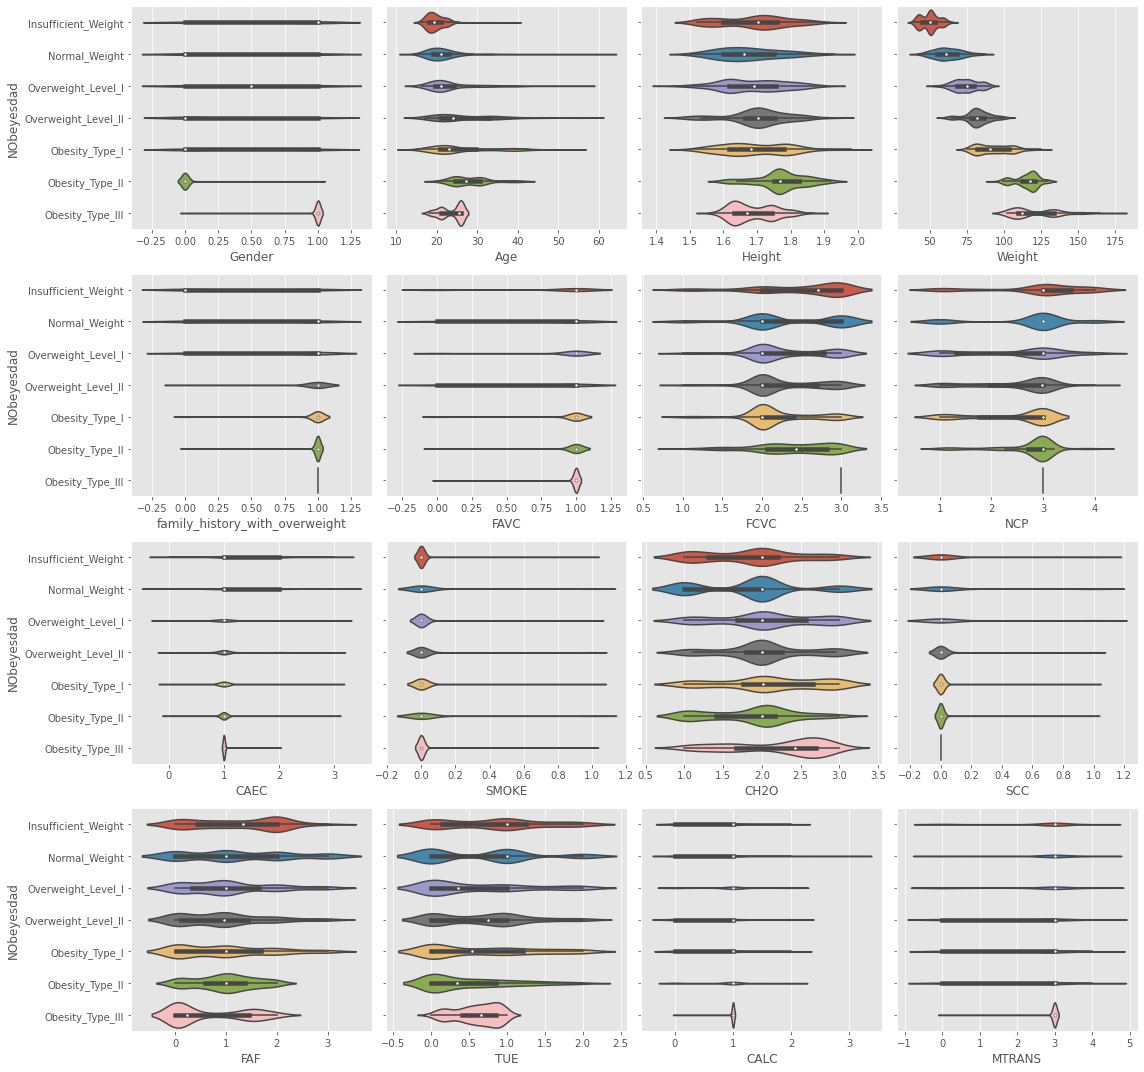

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(16,15), sharey=True)

df_caty = df.copy()
df_caty['NObeyesdad'] = df_caty['NObeyesdad'].apply(lambda x: inv_class[x])
for i, variable in enumerate(df_caty.columns[:-1]):
    sns.violinplot(data=df_caty, x=variable, y='NObeyesdad', ax=axs[i//4][i%4])
    axs[i//4][i%4].set_yticks(np.arange(len(class_labels)))
    axs[i//4][i%4].set_yticklabels(class_labels)
    if i%4!=0:
        axs[i//4][i%4].set(ylabel=None)
    
fig.tight_layout()  
plt.show()

In [ ]:
df_raw[cat_cols].describe(include='all')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


## Train & Test Split

In [ ]:
X_raw = df.drop('NObeyesdad', axis=1).copy()
y_raw = df['NObeyesdad'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, stratify=y_raw, random_state=42)

X_train.shape

(1688, 16)

In [ ]:
X_test.shape

(423, 16)

In [ ]:
df_muestras = pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1)
df_muestras.columns=['nTrain', 'nTest']
#df_muestras = df_muestras.loc[class_labels]
df_muestras

,nTrain,nTest
0,218,54
1,229,58
2,232,58
3,232,58
4,281,70
5,237,60
6,259,65


### Muestras por clase y Conjunto de dato

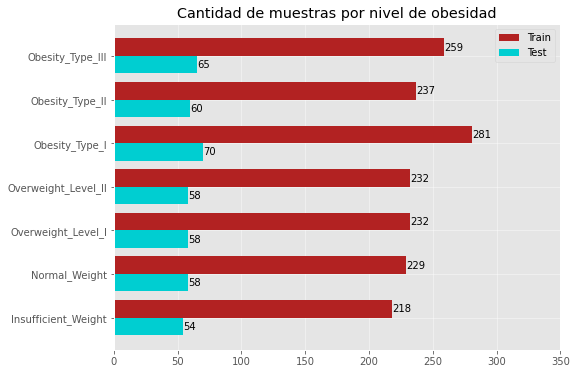

In [ ]:
n_test = df_muestras['nTest']
n_train = df_muestras['nTrain']
x_labels = class_labels
x_pos = np.arange(len(x_labels))
height = .4


fig, axes = plt.subplots(figsize=(8,6))
barras_train = axes.barh(x_pos+height/2, n_train, align='center', height=height, label='Train', color='firebrick')
barras_test = axes.barh(x_pos-height/2, n_test, align='center', height=height, label='Test', color='darkturquoise')

axes.set_title('Cantidad de muestras por nivel de obesidad')

axes.bar_label(barras_train)
axes.bar_label(barras_test)
axes.set_xlim(right=350)
axes.set_yticks(x_pos)
axes.set_yticklabels(x_labels)

axes.grid(alpha=.5)
axes.legend()
plt.show()